In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# Visualization 
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


# Taks .. Basic binary classification

In [2]:
# Load the data
tweets_df = pd.read_csv('all_data.csv')
tweets_df.shape

(156407, 3)

In [3]:
tweets_df.head()


Unnamed: 0                        text sentiment
0           0                      Ôªøÿ≠ŸÇÿß\n       pos
1           1                   ¬†ÿµÿ≠ ÿ¨ÿØÿß\n       pos
2           2             ÔªøÿßŸá Ÿà ÿßŸÑŸÜÿπŸÖÿ© \n       pos
3           3          ŸÉŸÑÿßŸÖŸÉ ÿ¨ŸÖŸäŸÑ Ÿàÿ±ÿßÿ¶ÿπ\n       pos
4           4  ÔªøŸà ÿÆŸäÿ± ÿßŸÑŸÉŸÑÿßŸÖ ŸÖÿß ŸÇŸÑ Ÿà ÿØŸÑ\n       pos

In [4]:
tweets_df.info()
# we didn't have any missed Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156407 entries, 0 to 156406
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  156407 non-null  int64 
 1   text        156407 non-null  object
 2   sentiment   156407 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.6+ MB


In [5]:
tweets_df.describe().transpose()

count          mean          std  min      25%      50%  \
Unnamed: 0  156407.0  76237.344652  45108.14796  0.0  37110.5  76212.0   

                 75%       max  
Unnamed: 0  115313.5  154415.0

In [6]:
tweets_df['text']

0                                                    Ôªøÿ≠ŸÇÿß\n
1                                                 ¬†ÿµÿ≠ ÿ¨ÿØÿß\n
2                                           ÔªøÿßŸá Ÿà ÿßŸÑŸÜÿπŸÖÿ© \n
3                                        ŸÉŸÑÿßŸÖŸÉ ÿ¨ŸÖŸäŸÑ Ÿàÿ±ÿßÿ¶ÿπ\n
4                                ÔªøŸà ÿÆŸäÿ± ÿßŸÑŸÉŸÑÿßŸÖ ŸÖÿß ŸÇŸÑ Ÿà ÿØŸÑ\n
                                ...                        
156402                      ŸÖÿπ ÿßŸÑÿßÿ≥ŸÅ üòî Ÿáÿßÿ±ÿØŸÑŸÉŸÖ ŸÇÿ®ŸÑ ÿßŸÑÿ≤ÿ≠ŸÖŸá\n
156403            ÿ®ÿµŸäŸäÿ≠ÿ≠ ÿßŸÑŸÉŸÑÿßŸÖ ÿßŸäÿ¨ÿßÿ®Ÿä ÿ®ÿ¥ŸÉŸÑ üíì üíì üíì üíì üíì üíì üòî\n
156404                           Ÿäÿßÿ±ÿ® ŸäŸàŸÖ ÿ≠ŸÑŸà ŸàÿÆŸÅŸäŸÅ üòî üíô üíî\n
156405                            ŸÅÿÆŸÖ ŸàÿßŸÑŸÑŸá Ÿäÿ≥ÿ™ÿßÿßŸáŸÑ üòî ‚ô• ‚ô•\n
156406    ÿßŸÑŸÑŸáŸÖ ÿßÿ¥ŸÅŸä ÿßÿÆÿ™Ÿä ŸÅÿßŸÜÿ™ ÿßÿπŸÑŸÖ ÿ®ÿ≠ÿßŸÑŸáÿß üôè üíî ÿßŸÑŸÑŸáŸÖ ÿ±ÿØ ...
Name: text, Length: 156407, dtype: object

In [7]:
# drop id column
tweets_df = tweets_df.drop(['Unnamed: 0'],axis =1)

In [8]:
tweets_df # Already dropped column

text sentiment
0                                                  Ôªøÿ≠ŸÇÿß\n       pos
1                                               ¬†ÿµÿ≠ ÿ¨ÿØÿß\n       pos
2                                         ÔªøÿßŸá Ÿà ÿßŸÑŸÜÿπŸÖÿ© \n       pos
3                                      ŸÉŸÑÿßŸÖŸÉ ÿ¨ŸÖŸäŸÑ Ÿàÿ±ÿßÿ¶ÿπ\n       pos
4                              ÔªøŸà ÿÆŸäÿ± ÿßŸÑŸÉŸÑÿßŸÖ ŸÖÿß ŸÇŸÑ Ÿà ÿØŸÑ\n       pos
...                                                   ...       ...
156402                    ŸÖÿπ ÿßŸÑÿßÿ≥ŸÅ üòî Ÿáÿßÿ±ÿØŸÑŸÉŸÖ ŸÇÿ®ŸÑ ÿßŸÑÿ≤ÿ≠ŸÖŸá\n       neg
156403          ÿ®ÿµŸäŸäÿ≠ÿ≠ ÿßŸÑŸÉŸÑÿßŸÖ ÿßŸäÿ¨ÿßÿ®Ÿä ÿ®ÿ¥ŸÉŸÑ üíì üíì üíì üíì üíì üíì üòî\n       neg
156404                         Ÿäÿßÿ±ÿ® ŸäŸàŸÖ ÿ≠ŸÑŸà ŸàÿÆŸÅŸäŸÅ üòî üíô üíî\n       neg
156405                          ŸÅÿÆŸÖ ŸàÿßŸÑŸÑŸá Ÿäÿ≥ÿ™ÿßÿßŸáŸÑ üòî ‚ô• ‚ô•\n       neg
156406  ÿßŸÑŸÑŸáŸÖ ÿßÿ¥ŸÅŸä ÿßÿÆÿ™Ÿä ŸÅÿßŸÜÿ™ ÿßÿπŸÑŸÖ ÿ®ÿ≠ÿßŸÑŸáÿß üôè üíî ÿßŸÑŸÑŸáŸÖ ÿ±ÿØ ...       neg

[156407 rows x 2 columns]

In [9]:
# Checking Null
tweets_df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [10]:
tweets_df['sentiment'] = tweets_df.sentiment.replace(to_replace=['pos', 'neg'], value=[0, 1])

In [11]:
tweets_df # ... Great

text  sentiment
0                                                  Ôªøÿ≠ŸÇÿß\n          0
1                                               ¬†ÿµÿ≠ ÿ¨ÿØÿß\n          0
2                                         ÔªøÿßŸá Ÿà ÿßŸÑŸÜÿπŸÖÿ© \n          0
3                                      ŸÉŸÑÿßŸÖŸÉ ÿ¨ŸÖŸäŸÑ Ÿàÿ±ÿßÿ¶ÿπ\n          0
4                              ÔªøŸà ÿÆŸäÿ± ÿßŸÑŸÉŸÑÿßŸÖ ŸÖÿß ŸÇŸÑ Ÿà ÿØŸÑ\n          0
...                                                   ...        ...
156402                    ŸÖÿπ ÿßŸÑÿßÿ≥ŸÅ üòî Ÿáÿßÿ±ÿØŸÑŸÉŸÖ ŸÇÿ®ŸÑ ÿßŸÑÿ≤ÿ≠ŸÖŸá\n          1
156403          ÿ®ÿµŸäŸäÿ≠ÿ≠ ÿßŸÑŸÉŸÑÿßŸÖ ÿßŸäÿ¨ÿßÿ®Ÿä ÿ®ÿ¥ŸÉŸÑ üíì üíì üíì üíì üíì üíì üòî\n          1
156404                         Ÿäÿßÿ±ÿ® ŸäŸàŸÖ ÿ≠ŸÑŸà ŸàÿÆŸÅŸäŸÅ üòî üíô üíî\n          1
156405                          ŸÅÿÆŸÖ ŸàÿßŸÑŸÑŸá Ÿäÿ≥ÿ™ÿßÿßŸáŸÑ üòî ‚ô• ‚ô•\n          1
156406  ÿßŸÑŸÑŸáŸÖ ÿßÿ¥ŸÅŸä ÿßÿÆÿ™Ÿä ŸÅÿßŸÜÿ™ ÿßÿπŸÑŸÖ ÿ®ÿ≠ÿßŸÑŸáÿß üôè üíî ÿßŸÑŸÑŸáŸÖ ÿ±ÿØ ...          1

[156407 rows x 2 columns]

<AxesSubplot:xlabel='sentiment', ylabel='count'>

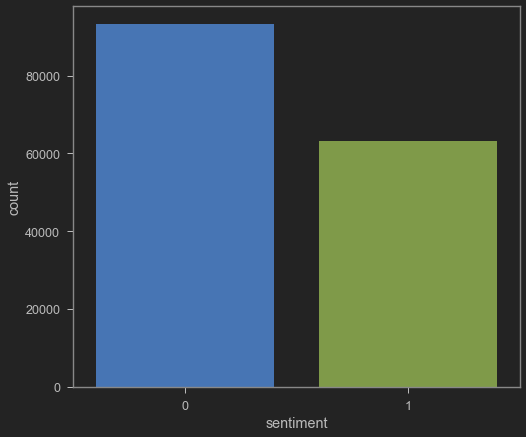

In [12]:
# distribution for labels 
sns.countplot(x = tweets_df['sentiment'], label = "count")

# 60% positive ... 40% negative

In [13]:
# Add length as a feature Column
tweets_df['length'] = tweets_df['text'].apply(len) # -apply function to all rows in this column 

In [14]:
tweets_df

text  sentiment  length
0                                                  Ôªøÿ≠ŸÇÿß\n          0       5
1                                               ¬†ÿµÿ≠ ÿ¨ÿØÿß\n          0       8
2                                         ÔªøÿßŸá Ÿà ÿßŸÑŸÜÿπŸÖÿ© \n          0      14
3                                      ŸÉŸÑÿßŸÖŸÉ ÿ¨ŸÖŸäŸÑ Ÿàÿ±ÿßÿ¶ÿπ\n          0      17
4                              ÔªøŸà ÿÆŸäÿ± ÿßŸÑŸÉŸÑÿßŸÖ ŸÖÿß ŸÇŸÑ Ÿà ÿØŸÑ\n          0      25
...                                                   ...        ...     ...
156402                    ŸÖÿπ ÿßŸÑÿßÿ≥ŸÅ üòî Ÿáÿßÿ±ÿØŸÑŸÉŸÖ ŸÇÿ®ŸÑ ÿßŸÑÿ≤ÿ≠ŸÖŸá\n          1      30
156403          ÿ®ÿµŸäŸäÿ≠ÿ≠ ÿßŸÑŸÉŸÑÿßŸÖ ÿßŸäÿ¨ÿßÿ®Ÿä ÿ®ÿ¥ŸÉŸÑ üíì üíì üíì üíì üíì üíì üòî\n          1      40
156404                         Ÿäÿßÿ±ÿ® ŸäŸàŸÖ ÿ≠ŸÑŸà ŸàÿÆŸÅŸäŸÅ üòî üíô üíî\n          1      25
156405                          ŸÅÿÆŸÖ ŸàÿßŸÑŸÑŸá Ÿäÿ≥ÿ™ÿßÿßŸáŸÑ üòî ‚ô• ‚ô•\n          1      24
156406  ÿßŸÑŸÑŸáŸÖ ÿßÿ¥ŸÅŸä ÿßÿÆÿ™Ÿä ŸÅÿßŸÜÿ™ ÿßÿπŸÑŸÖ ÿ®ÿ≠ÿßŸÑŸáÿß üôè üíî ÿßŸÑŸÑŸáŸÖ ÿ±ÿØ ...          1     131

[156407 rows x 3 columns]

<AxesSubplot:ylabel='Frequency'>

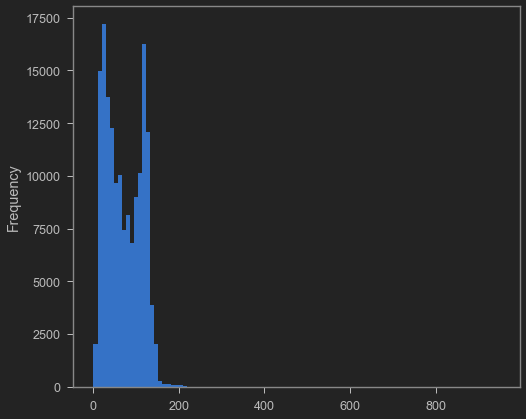

In [15]:
# see the distribution of length 
tweets_df['length'].plot(bins=100, kind='hist') 

# std of tweets between 20-200 characters  

In [16]:
tweets_df.describe().transpose()

count       mean        std  min   25%   50%    75%    max
sentiment  156407.0   0.404477   0.490792  0.0   0.0   0.0    1.0    1.0
length     156407.0  71.097144  41.850822  1.0  33.0  66.0  111.0  949.0

In [17]:
# Explore data 
tweets_df[tweets_df['length'] == 66] # average sentence in the database 

text  sentiment  length
83      ÔªøÿØÿπŸàÿßÿ™ŸÉ ŸÑŸÜÿß Ÿäÿß ÿ¥ŸäÿÆ ÿ≥ŸÑŸÖÿßŸÜ ÿ®ÿßŸÑÿ™ŸàŸÅŸäŸÇ Ÿà ÿßŸÑŸÅŸÑÿßÿ≠ Ÿà ÿß...          0      66
586     ŸÖÿßÿ¥ÿßÿ° ÿßŸÑŸÑŸá ÿπŸÑŸäŸÉŸÖ ÿ®ÿ¨ÿØ ŸÖŸàÿ∂Ÿàÿπ ŸÖŸáŸÖ ÿ¨ÿØÿß ŸàÿßŸÑÿßŸáŸÖ ÿßŸÑÿ±ŸÇ...          0      66
900     ÿßŸÑŸÑŸáŸÖ ÿ´ÿ®ÿ™Ÿá ÿπŸÑŸâ ÿØŸäŸÜ ÿßŸÑÿßÿ≥ŸÑÿßŸÖ ÿßŸÑŸÑŸáŸÖ Ÿäÿß ŸÖŸÇŸÑÿ® ÿßŸÑŸÇŸÑŸà...          0      66
914     ÿßŸáŸÑÿß ÿ®ŸäŸÉ ŸÅŸâ ÿØŸäŸÜ ÿßŸÑŸÑŸá ÿ±ÿ®ŸÜÿß Ÿäÿ´ÿ®ÿ™ŸÉ ŸàŸäÿ≤ŸäÿØŸÉ ÿßŸäŸÖÿßŸÜÿß ...          0      66
1391    ÿ¥Ÿà ÿπÿßÿØŸä Ÿäÿ≤ŸÖ ÿßŸÜÿ™ÿß ŸÖÿß ÿπŸÜÿØŸÉ ÿØŸÖ ŸàŸÜÿÆŸàŸá Ÿäÿ≤ŸÖ ÿßŸÜÿ™ÿß ŸÖÿ¥ ...          1      66
...                                                   ...        ...     ...
155702  ŸÑÿßÿ≤ŸÖ ÿßŸÑÿ¨ÿØŸä Ÿäÿ®ŸÇŸä ÿ±ÿßÿßÿ¥ŸÇ ŸÑŸà ŸÖŸÉŸÜÿ¥ ŸáŸà Ÿäÿ™ÿÆÿ≤ŸÇ ŸÖŸäŸÜ ŸäÿπŸÜ...          1      66
155812  ŸÖŸÜ ÿ∫ÿßÿ®ÿ™ ÿ≥Ÿäÿßÿ±ÿ© ÿßŸÑŸÅŸÑŸäÿ™ ŸÖÿßŸÑ ÿßŸÑÿ®ŸÑÿØŸäÿ© Ÿà ÿßŸÑÿ∞ÿ®ÿßÿ® ŸÅÿßÿ±ÿØ...          1      66
156035  ŸàÿßŸÑŸÑŸá ŸÖÿßÿ®ÿ™ŸÅÿ±ŸÇ ÿ®ÿ¥ŸàŸÅ ÿ®ŸÜÿßÿ™ ÿ®Ÿäÿ¨Ÿà ÿπÿßŸÑÿ¨ÿßŸÖÿπÿ© ÿ®ÿ≥ÿ™ÿ∫ÿ±ÿ® ŸÉ...          1      66
156285  Ÿáÿ∞ÿß ÿ®ÿ≥ ÿßÿπÿ±ÿ∂Ÿá ŸÑŸÑŸÜÿßÿ≥ ŸàÿßŸÜÿß ŸÉÿ∞ÿßÿ® ÿ®ÿ≥ ÿßŸÜÿ™Ÿä ÿßŸÑŸä ÿ®ÿµÿ±ŸÅ ...          1      66
156329  ÿ¥ŸÉÿ±ÿß Ÿã ŸÑÿ®ÿßÿ®ÿß ŸÑÿßŸÜŸá Ÿäÿ≥ŸÑŸÉ Ÿà ŸäÿßŸÉŸÑ ÿ∑ÿ®ÿÆÿßÿ™Ÿä ÿßŸÑŸÅÿßÿ¥ŸÑÿ© ÿ®...          1      66

[842 rows x 3 columns]

In [18]:
# Make positive data fram
positive = tweets_df[tweets_df['sentiment']==0]
positive

text  sentiment  length
0                                                 Ôªøÿ≠ŸÇÿß\n          0       5
1                                              ¬†ÿµÿ≠ ÿ¨ÿØÿß\n          0       8
2                                        ÔªøÿßŸá Ÿà ÿßŸÑŸÜÿπŸÖÿ© \n          0      14
3                                     ŸÉŸÑÿßŸÖŸÉ ÿ¨ŸÖŸäŸÑ Ÿàÿ±ÿßÿ¶ÿπ\n          0      17
4                             ÔªøŸà ÿÆŸäÿ± ÿßŸÑŸÉŸÑÿßŸÖ ŸÖÿß ŸÇŸÑ Ÿà ÿØŸÑ\n          0      25
...                                                  ...        ...     ...
94130                          ÿßÿ∑ŸÑŸÇ ÿµÿ®ÿßÿ≠ üòö ‚ô• Ô∏è ‚ô• Ô∏è ‚ô• Ô∏è\n          0      24
94131               Ÿä ÿßŸäŸÖÿßÿßŸä üíô üíô ŸÜŸàÿ±ÿ™ ÿ™ŸàŸäÿ™ÿ± Ÿäÿ≥ÿ™ÿß üòö üòÇ ‚ô•\n          0      35
94132                                   Ÿáÿ™Ÿàÿ≠ÿ¥ŸäŸÜŸä üòö üòÇ üòÇ\n          0      15
94133  ÿßŸÑŸÑŸáŸÖ Ÿäÿ≠ŸÖŸäŸÉŸÖ ŸàŸäŸÜÿµÿ±ŸÉŸÖ Ÿàÿ™ÿπŸàÿØÿß ŸÑŸÜÿß ÿ®ÿßŸÑÿµÿ≠Ÿá ŸàÿßŸÑÿπÿßŸÅŸä...          0     138
94134  ÿßŸÜÿ™Ÿä ŸÇŸÑÿ®Ÿä ŸàÿßŸÑŸÑŸá Ÿäÿß ÿ®Ÿäÿ®ÿß üòö üòö üòö üòö ‚ô• Ô∏è ‚ô• Ô∏è ‚ô• Ô∏è ‚ô• Ô∏è\n          0      48

[93144 rows x 3 columns]

In [19]:
# make negative data frame
negative = tweets_df[tweets_df['sentiment']==1]
negative

text  sentiment  length
1000    ÔªøŸà ÿßŸÑŸÑŸá ÿ≠ÿ±ÿßŸÖ Ÿà ÿßŸÑŸÑŸá ŸÖŸàÿ™ŸàŸá ŸÑÿ¥ÿπÿ® ÿßŸÑÿßÿ±ÿØŸÜŸä ŸÖŸÜ ŸàŸäŸÜ ...          1     126
1001    ÔªøÿßŸÑÿ®ŸÜÿ≤ŸäŸÜ Ÿäÿ¨Ÿä ŸÖŸÜ ÿßŸÑÿ≥ÿπŸàÿØŸäŸá ÿ®ÿ£ŸÇŸÑ ÿßŸÑÿßÿ≥ÿπÿßÿ± Ÿà ÿßŸÑÿ≠ŸÉŸàŸÖ...          1      64
1002                                        ÿßŸÑŸÑŸá ŸäŸàÿÆÿ∞ŸÉŸÖ\n          1      12
1003     ÿ¥Ÿà ŸáÿßÿØ ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸÖÿπŸÇŸàŸÑ ÿπÿ±ÿ∂ŸàŸá ÿπŸÑŸâ ÿßŸÑŸÇŸÜŸàÿßÿ™!!!!!!...          1      54
1004    ÔªøŸÑŸÑÿ£ÿ≥ŸÅ ÿßŸÑÿ®ÿπÿ∂ Ÿäÿπÿ™ŸÇÿØ ÿßŸÜ ÿßŸÑŸÖŸÅÿßÿπŸÑ ÿßŸÑŸÜŸàŸàŸä ÿ≥Ÿäÿ≠ŸÑ ŸÖÿ¥ÿßŸÉ...          1     389
...                                                   ...        ...     ...
156402                    ŸÖÿπ ÿßŸÑÿßÿ≥ŸÅ üòî Ÿáÿßÿ±ÿØŸÑŸÉŸÖ ŸÇÿ®ŸÑ ÿßŸÑÿ≤ÿ≠ŸÖŸá\n          1      30
156403          ÿ®ÿµŸäŸäÿ≠ÿ≠ ÿßŸÑŸÉŸÑÿßŸÖ ÿßŸäÿ¨ÿßÿ®Ÿä ÿ®ÿ¥ŸÉŸÑ üíì üíì üíì üíì üíì üíì üòî\n          1      40
156404                         Ÿäÿßÿ±ÿ® ŸäŸàŸÖ ÿ≠ŸÑŸà ŸàÿÆŸÅŸäŸÅ üòî üíô üíî\n          1      25
156405                          ŸÅÿÆŸÖ ŸàÿßŸÑŸÑŸá Ÿäÿ≥ÿ™ÿßÿßŸáŸÑ üòî ‚ô• ‚ô•\n          1      24
156406  ÿßŸÑŸÑŸáŸÖ ÿßÿ¥ŸÅŸä ÿßÿÆÿ™Ÿä ŸÅÿßŸÜÿ™ ÿßÿπŸÑŸÖ ÿ®ÿ≠ÿßŸÑŸáÿß üôè üíî ÿßŸÑŸÑŸáŸÖ ÿ±ÿØ ...          1     131

[63263 rows x 3 columns]

In [20]:
# Plot the World Cup
sentences = tweets_df['text'].tolist()
sentences

['\ufeffÿ≠ŸÇÿß\n',
 '\xa0ÿµÿ≠ ÿ¨ÿØÿß\n',
 '\ufeffÿßŸá Ÿà ÿßŸÑŸÜÿπŸÖÿ© \n',
 'ŸÉŸÑÿßŸÖŸÉ ÿ¨ŸÖŸäŸÑ Ÿàÿ±ÿßÿ¶ÿπ\n',
 '\ufeffŸà ÿÆŸäÿ± ÿßŸÑŸÉŸÑÿßŸÖ ŸÖÿß ŸÇŸÑ Ÿà ÿØŸÑ\n',
 '\ufeffŸàŸÑÿß ÿ™ŸÜÿ≥Ÿà ÿ™ÿ®ÿ≥ŸÖŸÉ ŸÅŸä Ÿàÿ¨Ÿá ÿßÿÆŸäŸÉ ÿµÿØŸÇŸá\n',
 '\ufeffŸÑŸäÿ™ŸÜÿß ŸÜÿ≥ÿ™ÿ∑Ÿäÿπ ÿßŸÑÿßÿ®ÿ™ÿ≥ÿßŸÖŸá ŸÅŸä ÿßŸÑÿßŸàŸÇÿßÿ™ ÿßŸÑŸÖÿ§ŸÑŸÖŸá\n',
 '\ufeffŸà ÿ®ÿ≠ÿ® ÿßŸÑŸÜÿßÿ≥ ÿßŸÑÿ±ÿßŸäŸÇŸá ÿßŸÑŸä ÿ®ÿ™ÿ∂ÿ≠ŸÉ ÿπŸÑŸâ ÿ∑ŸàŸÑ\n',
 '\ufeffÿßÿ®ÿ™ÿ≥ŸÖ ÿßŸÖÿßŸÖ ŸÉŸÑ ÿßŸÑŸÜÿßÿ≥ ŸÑÿ™ÿ≥ÿ±ŸáŸÖ Ÿà ÿ™ÿ¨ÿ®ÿ± ÿÆŸàÿßÿ∑ÿ±ŸáŸÖ ŸÅÿ™ÿ®ÿ≥ŸÖŸÉ ŸÅŸä Ÿàÿ¨ŸàŸáŸáŸÖ ÿµÿØŸÇŸá\n',
 '\ufeffŸà ÿßŸÑŸÑŸá ÿßŸÜÿ™ ÿ≠ÿ®Ÿäÿ®Ÿä \n',
 '\ufeffÿµÿ≠ ŸÅÿßŸÑÿßÿ®ÿ™ÿ≥ÿßŸÖŸá ÿ™ÿµŸÜÿπ ÿßŸÑÿ≥ÿπÿßÿØŸá\n',
 '\ufeffÿßŸÑÿßÿ®ÿ™ÿ≥ÿßŸÖŸá ÿ¨ŸÖŸäŸÑŸá\n',
 '\ufeffÿßÿ®ÿ™ÿ≥ŸÖ ÿ®ŸÜŸäŸá ÿ∑Ÿäÿ®Ÿá Ÿà ŸÅŸÇÿ∑\n',
 '\xa0ŸÖÿπŸÉ ÿ≠ŸÇ\n',
 'ŸÑÿ∑ŸäŸÅ\n',
 'ÿßŸÑÿ®ÿ≥ŸÖŸá ÿ≥ÿ± ŸÖŸÜ ÿßÿ≥ÿ±ÿßÿ± ÿßŸÑÿ≠Ÿäÿßÿ©\n',
 'ŸÉŸÑ ÿ≥ŸÜŸá ŸàÿßŸÜÿ™ŸÖ ÿ∑Ÿäÿ®ŸäŸÜ\n',
 '\ufeffÿ£ÿ¨ŸÖŸÑ ÿßÿ®ÿ™ÿ≥ÿßŸÖŸá\n',
 'ÿßŸÑÿßÿ®ÿ™ÿ≥ÿßŸÖŸá ŸÉŸÑŸÖŸá ÿ∑Ÿäÿ®Ÿá ÿ®ÿ∫Ÿäÿ± ÿ≠ÿ±ŸàŸÅ\n',
 'ÿ£ŸÅÿπÿßŸÑ ŸÑÿß ÿ™ÿ∂ÿßŸáŸäŸáÿß ÿ£ŸÇŸàÿßŸÑ

In [21]:
sentences[0]

'\ufeffÿ≠ŸÇÿß\n'

In [22]:
len(sentences) # we have 156407 sentence 

156407

In [23]:
sentences_as_one_string = " ".join(sentences) 


In [51]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

wordcloud = WordCloud(font_path='arial.ttf')


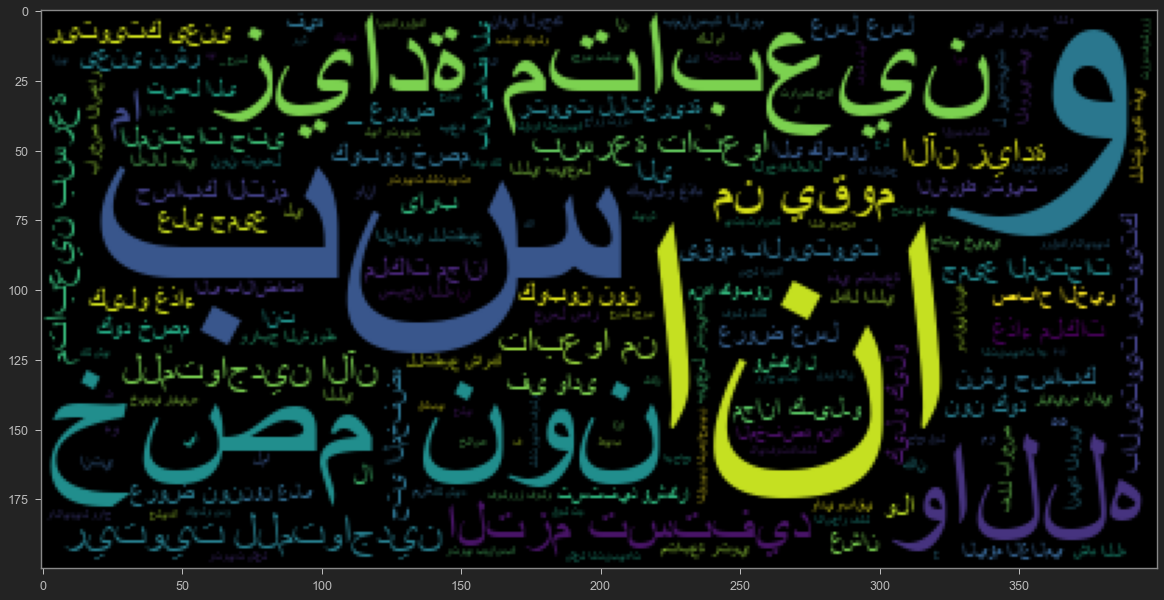

In [52]:
# Visual Representation for all text that we have 
plt.figure(figsize=(20,20))
plt.imshow(wordcloud.generate(sentences_as_one_string)) # positive and negative words 

In [57]:
pip install --upgrade arabic-reshaper

In [58]:
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [60]:
word_cloud = WordCloud(font_path='arial', stopwords=STOPWORDS, background_color="white", max_font_size=50, max_words=100)


In [66]:
text_to_be_reshaped = 'ÿßŸÑŸÑÿ∫ÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿ±ÿßÿ¶ÿπÿ©'
reshaped_text = arabic_reshaper.reshape(text_to_be_reshaped)
reshaped_text

'Ô∫çÔªüÔª†ÔªêÔ∫î Ô∫çÔªüÔªåÔ∫ÆÔ∫ëÔª¥Ô∫î Ô∫≠Ô∫çÔ∫ãÔªåÔ∫î'

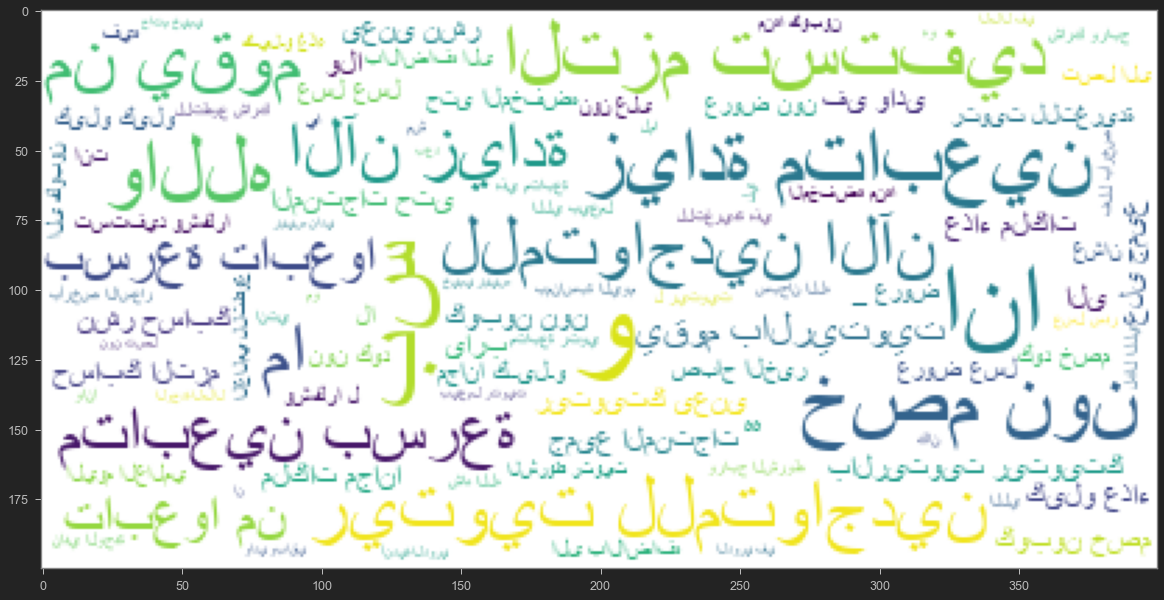

In [64]:
# Visual Representation for all text that we have 
plt.figure(figsize=(20,20))
word_cloud = word_cloud.generate(sentences_as_one_string)
plt.imshow(word_cloud)



In [29]:
negative_sentences = negative['text'].tolist()

negative_sentence_as_one_string = " ".join(negative_sentences)

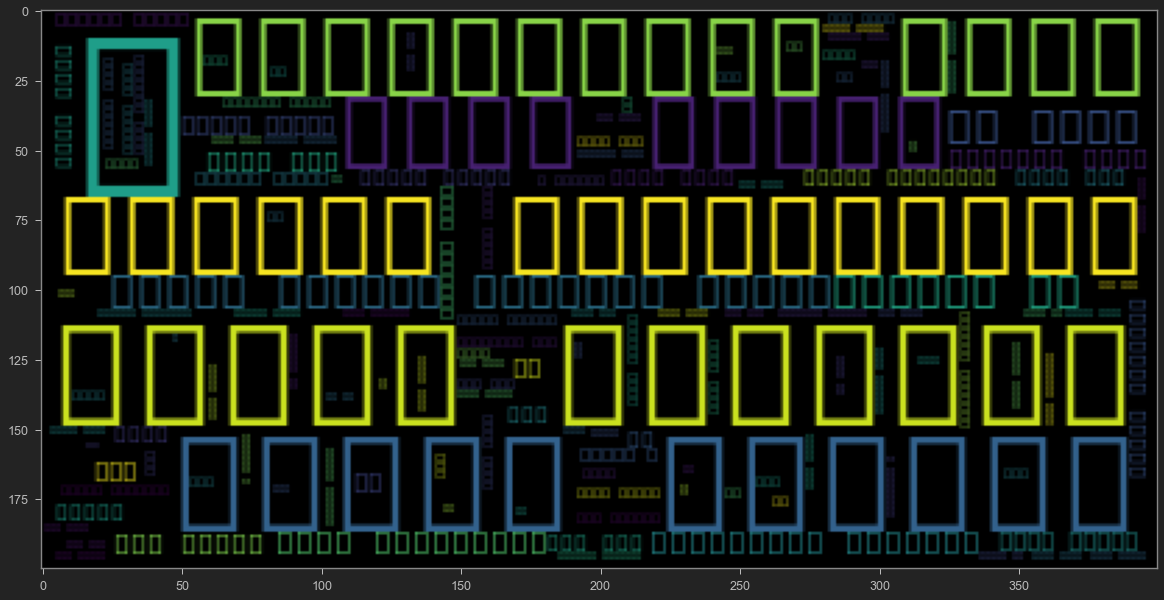

In [53]:
# Visualization for negative words 
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentence_as_one_string))